# Table of Contents
1. Import libraries
2. Import data set
3. Address possible privacy issues
4. Analyze departments and products
5. Analyze spending by US region
6. Analyze ordering/spending habits

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Import data set

In [2]:
# Define path
path = r'/Users/elisabetta/Documents/12-2022 Instacart Basket Analysis'

In [3]:
# Import latest file
df_ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
# Check output
df_ords_prods_custs.shape

(32404854, 24)

In [5]:
df_ords_prods_custs.head()

,order_id,user_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,price,...,spend_flag,frequency_flag,first_name,second_name,gender,state,age,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,...,Low spender,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,...,Low spender,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,...,Low spender,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,...,Low spender,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,...,Low spender,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423


# 3. Address possible privacy issues

In [6]:
# For privacy reasons, drop first_name and second_name columns. Customers will still be identifiable via their unique user_id

# Drop column first_name
df_ords_prods_custs = df_ords_prods_custs.drop(columns = ['first_name'])

# Drop column second_name
df_ords_prods_custs = df_ords_prods_custs.drop(columns = ['second_name'])

In [7]:
# Check output
df_ords_prods_custs.shape

(32404854, 22)

In [8]:
df_ords_prods_custs.head()

,order_id,user_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,price,...,busiest_period_of_day,loyalty_flag,spend_flag,frequency_flag,gender,state,age,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,...,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,...,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,...,Most orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,...,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,...,Most orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423


# 4. Analyze departments and products

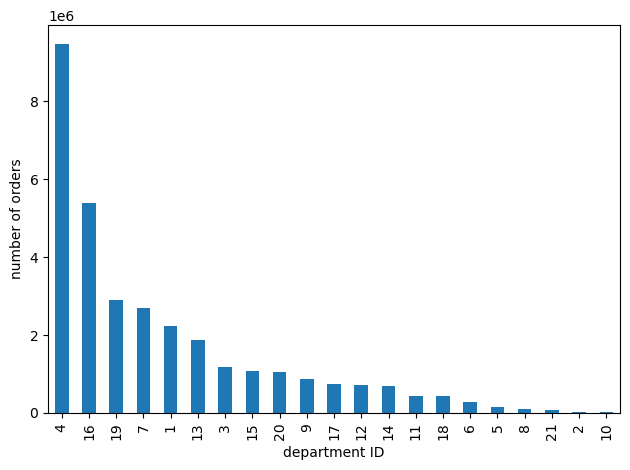

In [9]:
# What departments sell the most products?
bar_departments = df_ords_prods_custs['department_id'].value_counts().plot.bar()
plt.xlabel('department ID')
plt.ylabel('number of orders')
plt.tight_layout()

In [10]:
# Export bar chart
bar_departments.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments_4.10.png'))

# 5. Analyze spending by US region

In [11]:
# Check what states we have
df_ords_prods_custs['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Nevada                  636139
Arkansas                636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [12]:
# Create region flag
regions_for = []
for value in df_ords_prods_custs['state']:
    if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
        regions_for.append('Northeast')
    elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
        regions_for.append('Midwest')
    elif value == '' or value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
        regions_for.append('South')
    elif value == '' or value == 'Idaho' or value == 'Montana' or value == 'Wyoming' or value == 'Nevada' or value == 'Utah' or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico' or value == 'Alaska' or value == 'Washington' or value == 'Oregon' or value == 'California' or value == 'Hawaii':
        regions_for.append('West')
    else:
        regions_for.append('No data')

In [13]:
# Check output 
regions_for

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [14]:
# Put output in new column region
df_ords_prods_custs['region'] = regions_for

In [15]:
# Check output
df_ords_prods_custs['region'].value_counts(dropna = False)

South        10791880
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [16]:
df_ords_prods_custs.shape

(32404854, 23)

In [32]:
# Create a reduced dataframe and at the same time group by region and sum up price
df_region_price_grouped = df_ords_prods_custs.groupby(['region'])['price'].sum()

In [33]:
# Check output
df_region_price_grouped

region
Midwest       96603658.7
Northeast     66126199.8
South        131613228.3
West          93874398.7
Name: price, dtype: float64

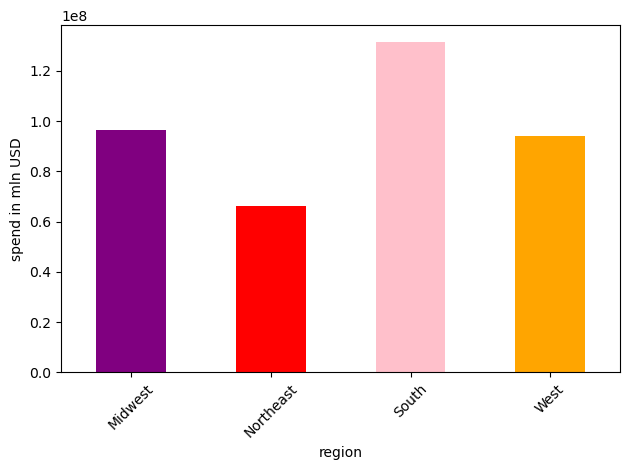

In [62]:
# Create bar chart using new reduced dataframe
bar_region_price = df_region_price_grouped.plot.bar(x = 'region', y = 'price', color = ['purple', 'red', 'pink', 'orange'])
plt.xlabel('region')
plt.ylabel('spend in mln USD')
plt.xticks (rotation = 45)
plt.tight_layout()

In [63]:
# Export bar chart
bar_region_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_price_4.10.png'))

# 6. Analyze ordering/spending habits

In [48]:
# Create a reduced dataframe loyalty/number orders
df_loyalty_num_orders = df_ords_prods_custs.groupby(['loyalty_flag'])['number_of_orders'].sum()

In [49]:
# Check output
df_loyalty_num_orders

loyalty_flag
Loyal customer      335685098
New customer         23771137
Regular customer    196037725
Name: number_of_orders, dtype: int64

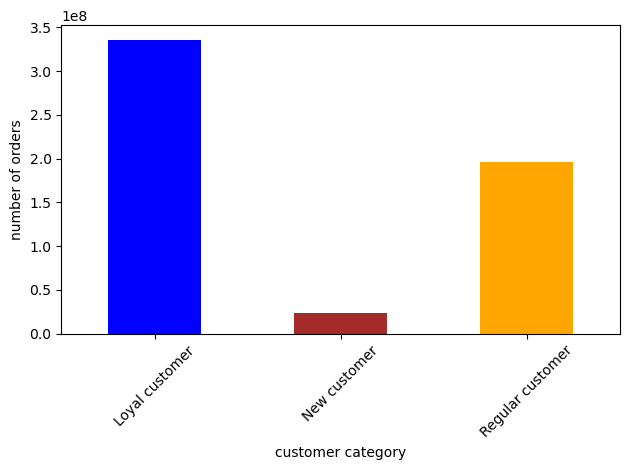

In [57]:
# Create bar chart using new reduced dataframe loyalty/number orders
bar_loyalty_num_orders = df_loyalty_num_orders.plot.bar(x = 'loyalty_flag', y = 'number_of_orders', color = ['blue', 'brown', 'orange'])
plt.xlabel('customer category')
plt.ylabel('number of orders')
plt.xticks (rotation = 45)
plt.tight_layout()

In [51]:
# Create a reduced dataframe loyalty/price
df_loyalty_price = df_ords_prods_custs.groupby(['loyalty_flag'])['price'].sum()

In [52]:
# Check output
df_loyalty_price

loyalty_flag
Loyal customer      106814042.2
New customer         83011750.1
Regular customer    198391693.2
Name: price, dtype: float64

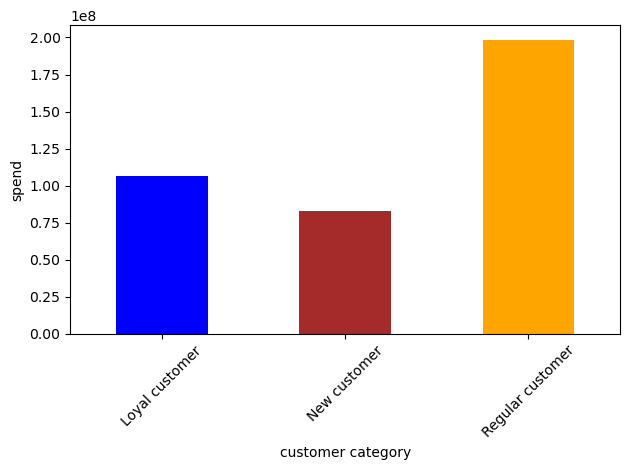

In [60]:
# Create bar chart using new reduced dataframe loyalty/price
bar_loyalty_price = df_loyalty_price.plot.bar(x = 'loyalty_flag', y = 'price', color = ['blue', 'brown', 'orange'])
plt.xlabel('customer category')
plt.ylabel('spend')
plt.xticks (rotation = 45)
plt.tight_layout()

In [61]:
# Export bar charts
bar_loyalty_num_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_num_orders_4.10.png'))
bar_loyalty_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_price_4.10.png'))